# Filtering and predicting using the darts filters
In this notebook, we will look at the Kalman filtering algorithm being used to improve quality of a noise affected data. White noise is quite common part of the data retrieved from any kind of sensors.

Kalman Filter is part of the Timeseries models and its classified as a filtering model. Filtering models are used to predict more accurate state (closer to the real state) of measured values.



In [69]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from importlib.machinery import SourceFileLoader
foo = SourceFileLoader("darts", "/Users/matejpetrik/workspaces/darts/repository/darts/darts/__init__.py").load_module()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models.kalman_filter import KalmanFilter


### 

## Adding white noise to the spiral drawing

First let's produce a simple drawing and add a significant white noise to it.

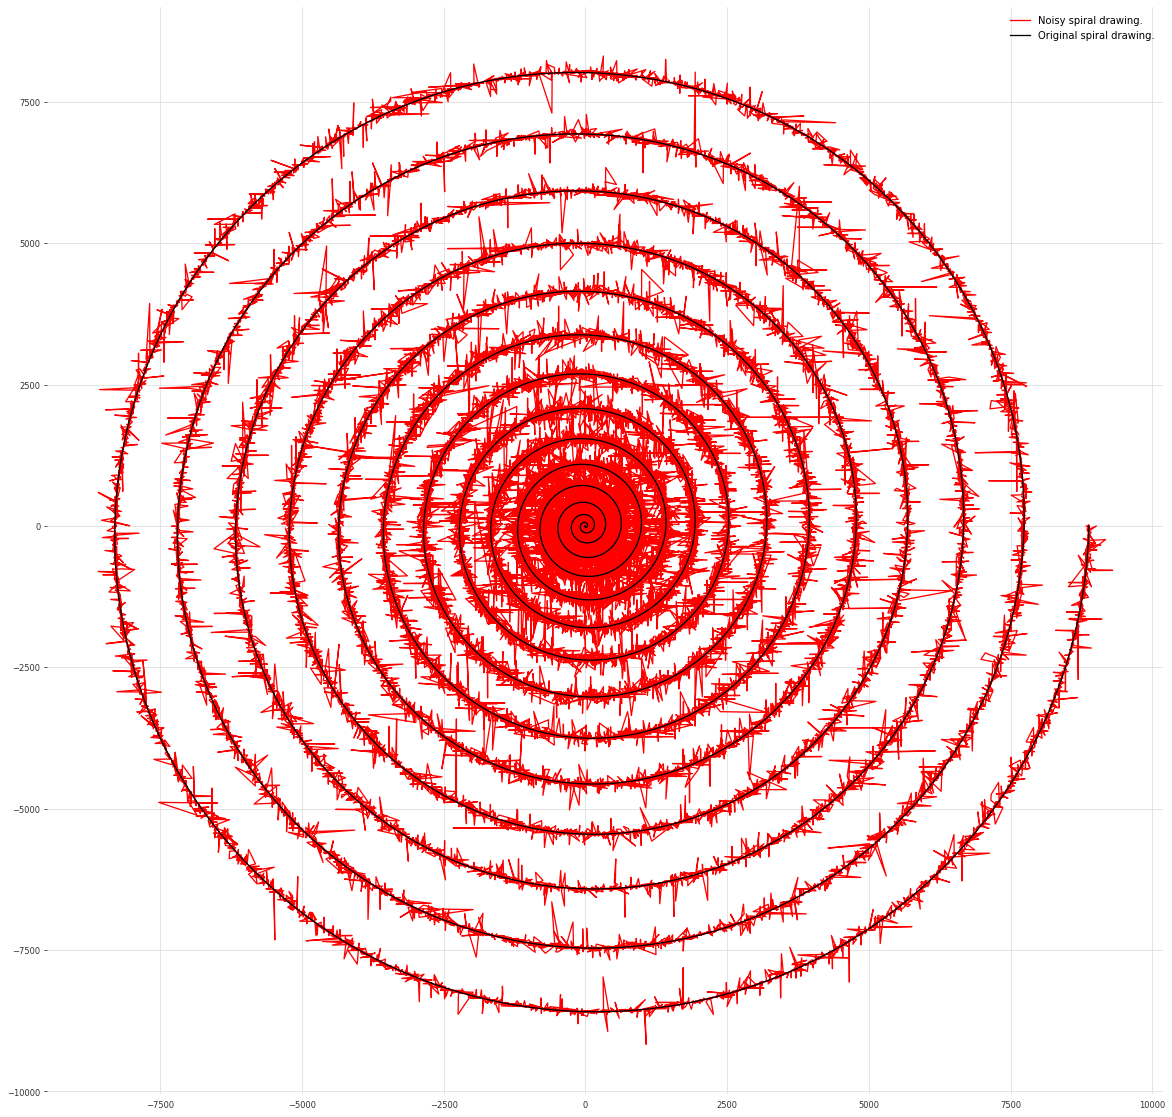

In [70]:
NOISE_DISTANCE = 0.5
SAMPLE_SIZE = 100000
RESIZE_NOISE = 150

# Prepare the drawing
theta = np.radians(np.linspace(0,360*15,SAMPLE_SIZE))
r = theta**2
x_2 = r*np.cos(theta)
y_2 = r*np.sin(theta)

# add white noise (gaussian noise, can be mapped from the random distribution using rand**3)
# and resize to RESIZE_NOISE
x_2_noise = x_2 + (np.random.normal(0, NOISE_DISTANCE, SAMPLE_SIZE)**3)*RESIZE_NOISE
y_2_noise = y_2 + (np.random.normal(0, NOISE_DISTANCE, SAMPLE_SIZE)**3)*RESIZE_NOISE

plt.figure(figsize=[20,20])
plt.plot(x_2_noise,y_2_noise,color='red', label='Noisy spiral drawing.')
plt.plot(x_2,y_2, label='Original spiral drawing.')
plt.legend()
plt.show()





## Configure the kalman filters and use it to adjust the measured data.

By experimenting with the Kalman filter we can reduce the noise from previously generated noise-affected drawing quite significantly without using the original (real, often impossible to measure) values:

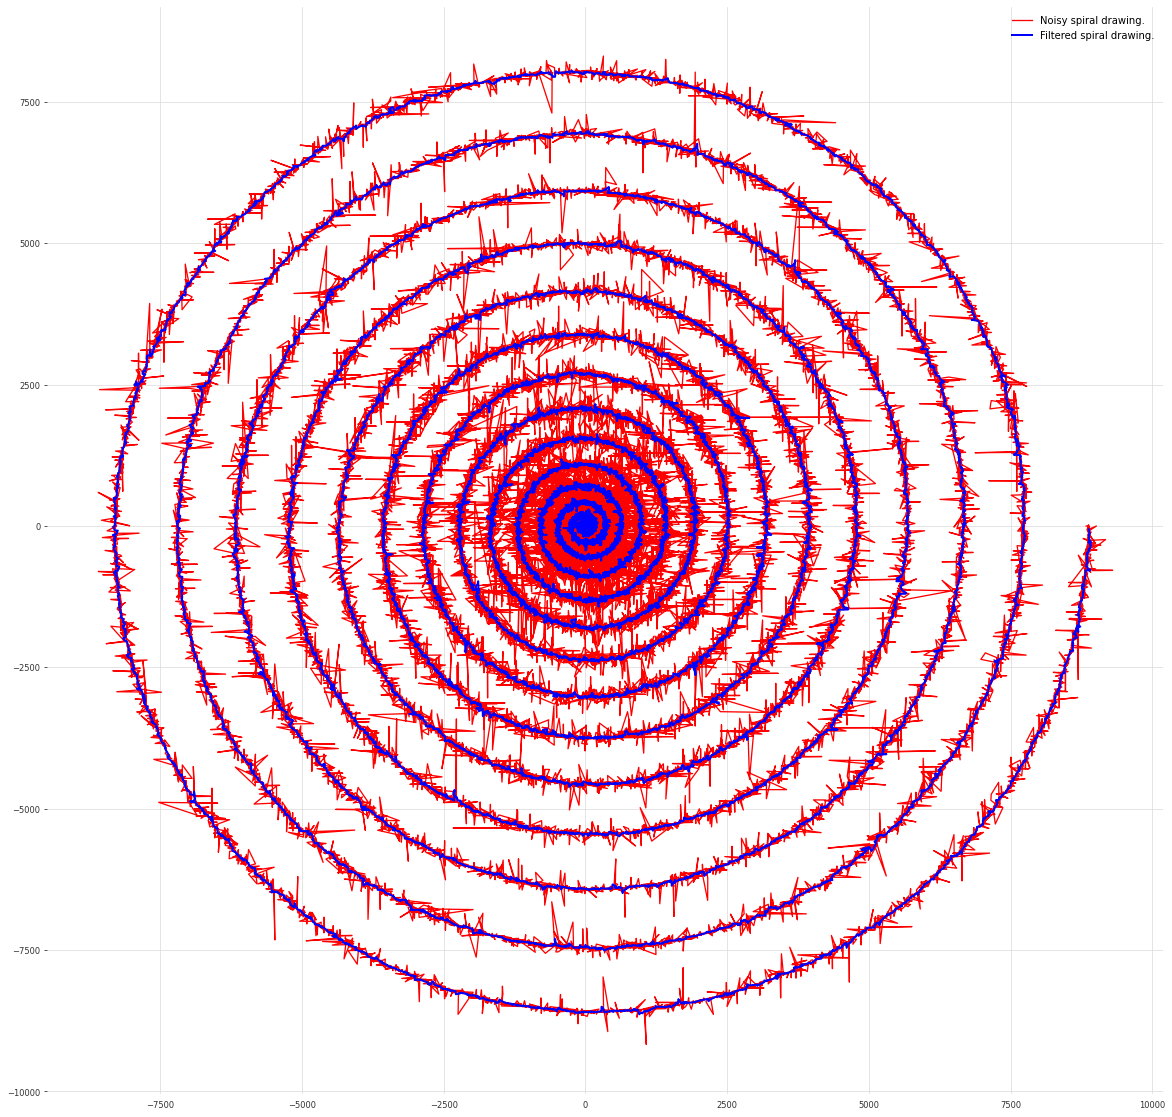

In [72]:

x_noise_reduced = KalmanFilter(P=1000., R=50).filter(TimeSeries.from_dataframe(pd.DataFrame(x_2_noise))).values()
y_noise_reduced = KalmanFilter(P=1000., R=50).filter(TimeSeries.from_dataframe(pd.DataFrame(y_2_noise))).values()

plt.figure(figsize=[20,20])
plt.plot(x_2_noise,y_2_noise,color='red', label='Noisy spiral drawing.')
plt.plot(x_noise_reduced, y_noise_reduced, color='blue', linewidth=2, label='Filtered spiral drawing.')
plt.legend()


